<a href="https://colab.research.google.com/github/devlai23/MusicClassifier/blob/main/CS_Project_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               filename  length  ...  mfcc20_var  label
0     blues.00000.0.wav   66149  ...   43.771767      0
1     blues.00000.1.wav   66149  ...   59.943081      0
2     blues.00000.2.wav   66149  ...   33.105122      0
3     blues.00000.3.wav   66149  ...   32.023678      0
4     blues.00000.4.wav   66149  ...   29.146694      0
...                 ...     ...  ...         ...    ...
9985   rock.00099.5.wav   66149  ...   38.966969      9
9986   rock.00099.6.wav   66149  ...   18.697033      9
9987   rock.00099.7.wav   66149  ...   41.586990      9
9988   rock.00099.8.wav   66149  ...   12.787750      9
9989   rock.00099.9.wav   66149  ...   31.727489      9

[9990 rows x 60 columns]


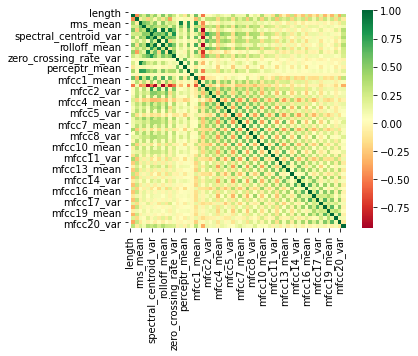

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

df = pd.read_csv('features_3_sec.csv')
df2 = pd.read_csv('features_30_sec.csv')

labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Turn labels into numerical values
for i in range(len(labels)):
  df = df.replace(labels[i], i)
  df2 = df2.replace(labels[i], i)

y = df['label']
X = df.drop('label', axis = 1).drop('filename', axis=1).drop('length', axis=1)

y2 = df2['label']
X2 = df2.drop('label', axis = 1).drop('filename', axis=1).drop('length', axis=1)

# Scale the features
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

cols = X2.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X2)
X2 = pd.DataFrame(np_scaled, columns = cols)

print(df)

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')



Highest Score: 0.94; i: 1


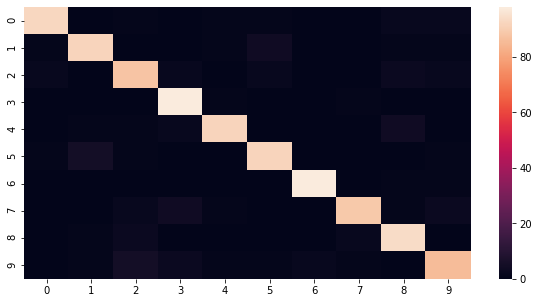

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#for random_state in range(1, 5):
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1 , random_state = 42, stratify = y)
X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size = 0.1 , random_state = 42, stratify = y2)

neighbors = range(1, 20)
test_accuracy = np.empty(len(neighbors))
highest_score = 0
highest_i = 0
confus_mat = 0

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    #train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X2_test, y2_test)
    if test_accuracy[i] > highest_score:
      highest_score = test_accuracy[i]
      highest_i = k
      
      preds = knn.predict(X_test)
      confus_mat = confusion_matrix(y_test, preds) 

# knn = KNeighborsClassifier()

# param_grid = {'n_neighbors': np.arange(3,10)}
# knn_cv = GridSearchCV(knn, param_grid,cv=3)

# knn_cv.fit(X_train, y_train)
# print(random_state)
# print(knn_cv.best_params_)
# print(knn_cv.best_score_)

# print(knn_cv.score(X2_test, y2_test))
    
plt.figure(figsize = (10, 5))
sns.heatmap(confus_mat)

print("Highest Score: %.2f; i: %d" % (highest_score, highest_i))

# Generate plot
# plt.title('k-NN: Varying Neighbors, random_state=' + str(random_state))
# plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
# plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
# plt.legend()
# plt.xlabel('Neighbors')
# plt.ylabel('Accuracy')
# plt.show()